## Problem Statement

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately.  
However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals.  

By leveraging machine learning techniques, insurers can more accurately predict insurance costs tailored to individual profiles, leading to:

- More competitive pricing  
- Improved risk management  
- Better alignment between premiums and actual health risks  

## Insurance Cost Prediction Need

The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market.  
Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders.  

By implementing a machine learning model, insurers can:

- **Enhance Precision in Pricing**: Use individual data points to determine premiums that reflect actual risk more closely than generic estimates.  
- **Increase Competitiveness**: Offer rates that are attractive to consumers while ensuring that the pricing is sustainable for the insurer.  
- **Improve Customer Satisfaction**: Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders.  
- **Enable Personalized Offerings**: Create customized insurance packages based on predicted costs, catering more directly to individual needs and preferences.  
- **Risk Assessment**: Refine risk assessment processes by identifying key factors that most significantly influence costs.  
- **Policy Development**: Use insights from the model to inform the creation of new insurance products or the adjustment of existing ones.  
- **Strategic Decision Making**: Support broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions.  
- **Customer Engagement**: Apply insights from the model in customer engagement initiatives, including personalized marketing and tailored advice for policyholders.  

## Data Description

The dataset comprises the following 11 attributes:

1. **Age**: Numeric, ranging from 18 to 66 years.  
2. **Diabetes**: Binary (0 or 1), where 1 indicates the presence of diabetes.  
3. **BloodPressureProblems**: Binary (0 or 1), indicating the presence of blood pressure-related issues.  
4. **AnyTransplants**: Binary (0 or 1), where 1 indicates the person has had a transplant.  
5. **AnyChronicDiseases**: Binary (0 or 1), indicating the presence of any chronic diseases.  
6. **Height**: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.  
7. **Weight**: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.  
8. **KnownAllergies**: Binary (0 or 1), where 1 indicates known allergies.  
9. **HistoryOfCancerInFamily**: Binary (0 or 1), indicating a family history of cancer.  
10. **NumberOfMajorSurgeries**: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.  
11. **PremiumPrice**: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.  

In [79]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [20]:
# importing the dataset
df = pd.read_csv('insurance.csv')

In [21]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# EDA and Hypothesis Testing

In [22]:
df.shape

(986, 11)

In [23]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [25]:
columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

In [26]:
for i in range(0, len(columns)):
    df[columns[i]] = df[columns[i]].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    category
 10  PremiumPrice             986 non-null    int64   
dtypes: category(7), int64(4)
memory usage: 38.6 KB


In [28]:
df.describe()

,Age,Height,Weight,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,24336.713996
std,13.963371,10.098155,14.265096,6248.184382
min,18.000000,145.000000,51.000000,15000.000000
25%,30.000000,161.000000,67.000000,21000.000000
50%,42.000000,168.000000,75.000000,23000.000000
75%,53.000000,176.000000,87.000000,28000.000000
max,66.000000,188.000000,132.000000,40000.000000


In [29]:
df.describe(include = 'category')

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
count,986,986,986,986,986,986,986
unique,2,2,2,2,2,2,4
top,0,0,0,0,0,0,0
freq,572,524,931,808,774,870,479


In [30]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [31]:
print(df.duplicated().sum())

0


## Distribution Analysis

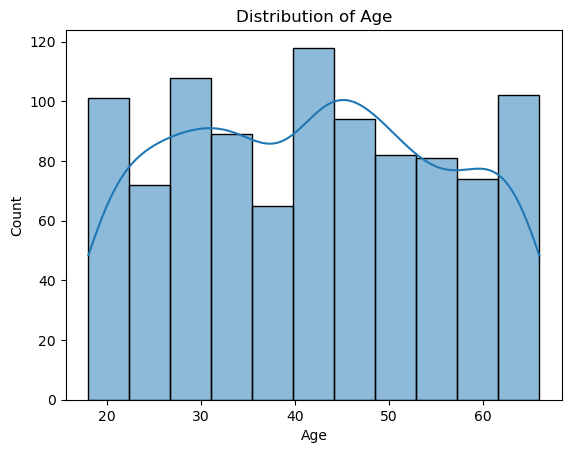

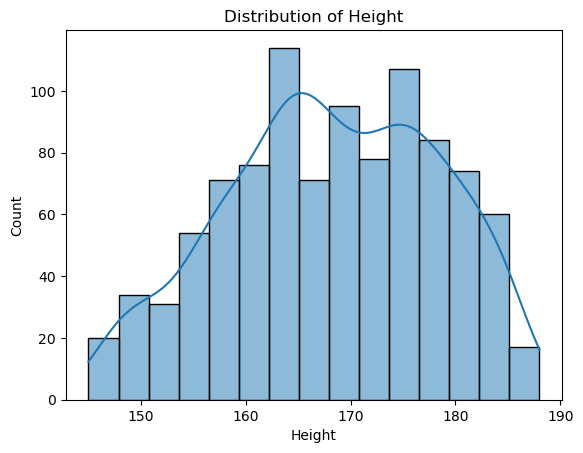

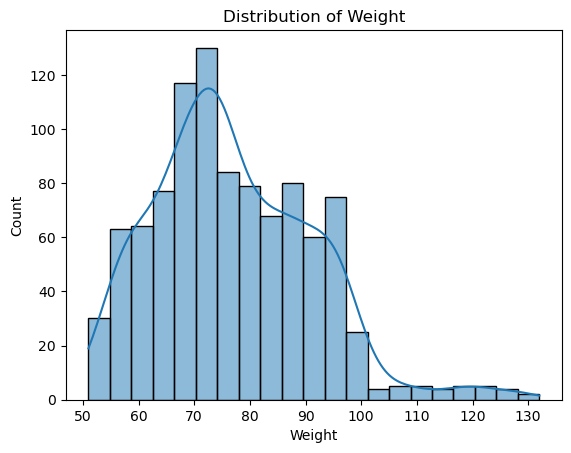

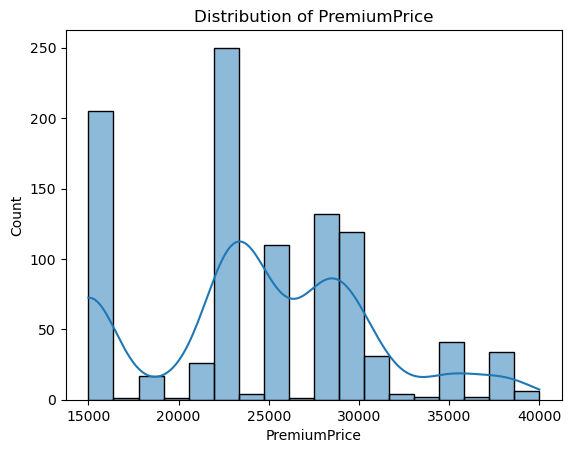

In [33]:
numeric_cols = ['Age', 'Height', 'Weight','PremiumPrice']

for col in numeric_cols:
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

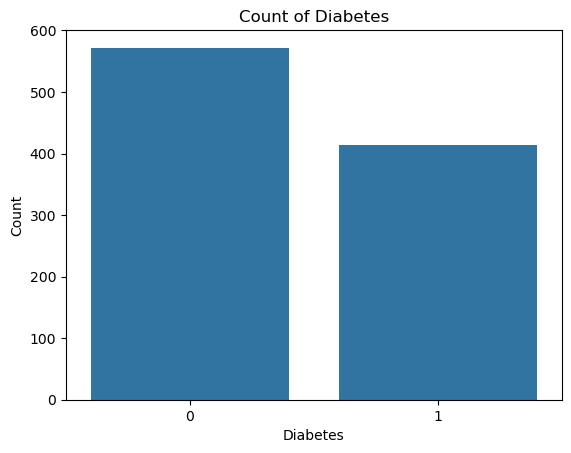

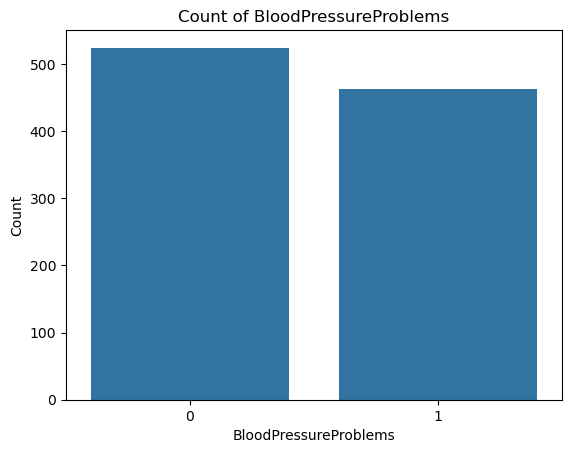

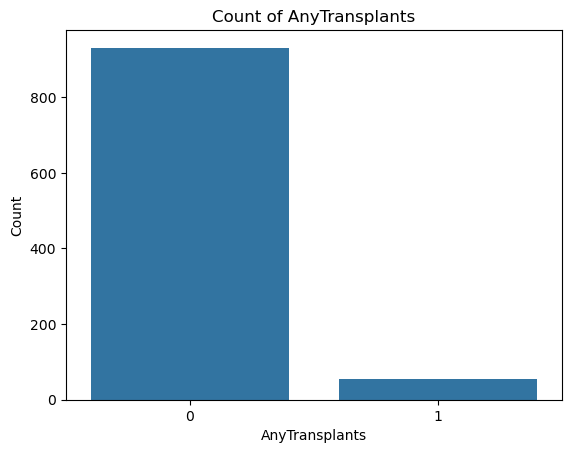

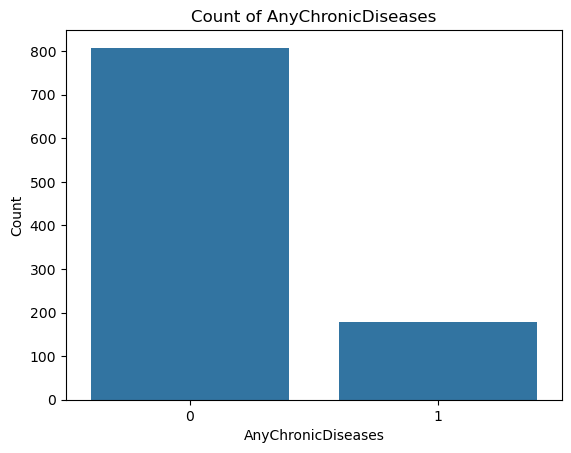

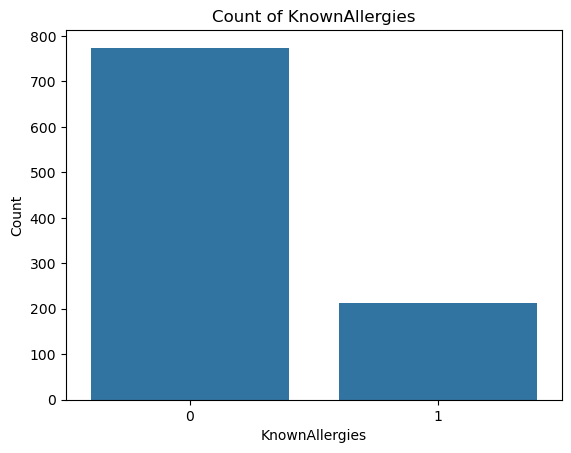

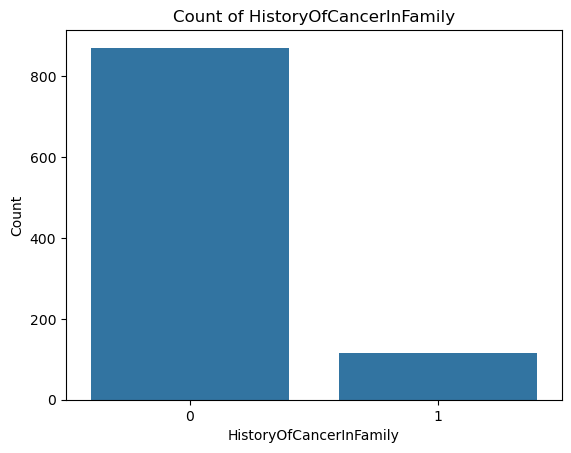

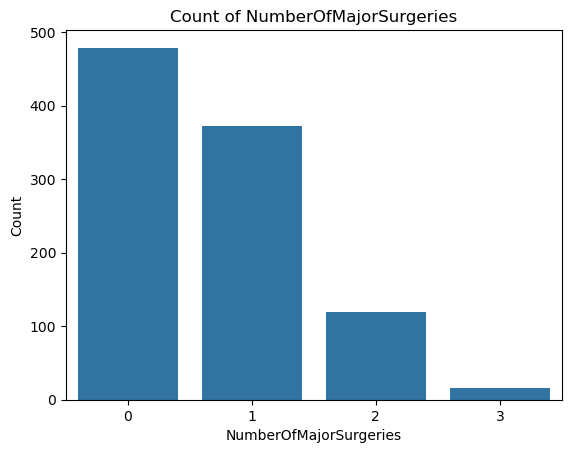

In [15]:
binary_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily','NumberOfMajorSurgeries'
]

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    category
 10  PremiumPrice             986 non-null    int64   
dtypes: category(7), int64(4)
memory usage: 38.6 KB


## Bivariate Analysis

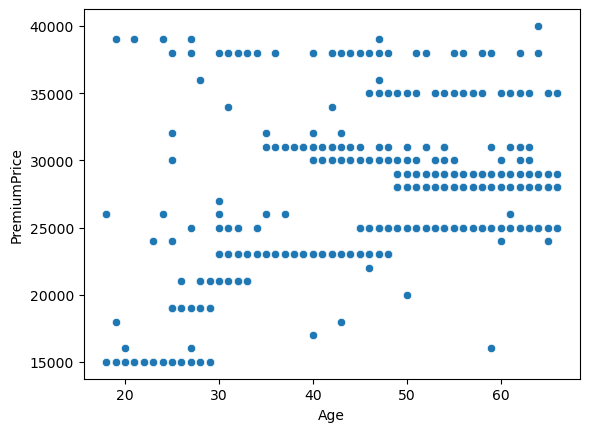

In [36]:
sns.scatterplot(data=df, x="Age", y="PremiumPrice")

plt.show()

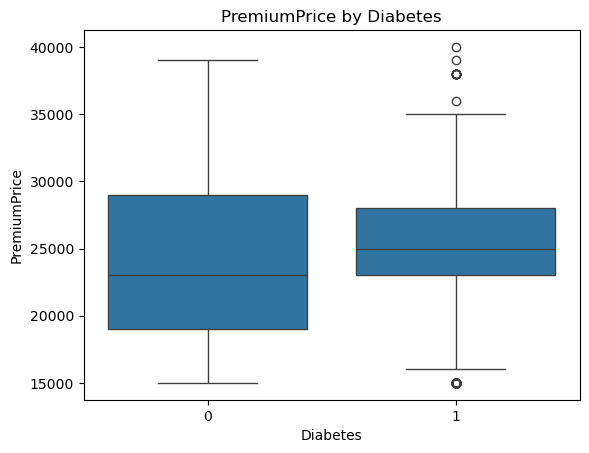

In [37]:
sns.boxplot(x='Diabetes', y='PremiumPrice', data=df)
plt.title("PremiumPrice by Diabetes")
plt.show()

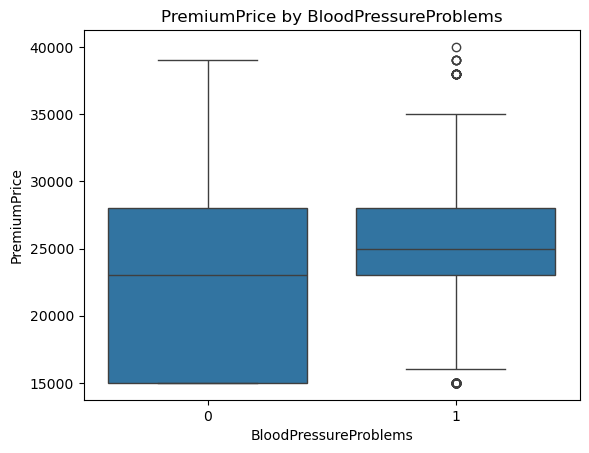

In [40]:
sns.boxplot(x='BloodPressureProblems', y='PremiumPrice', data=df)
plt.title("PremiumPrice by BloodPressureProblems")
plt.show()

In [47]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

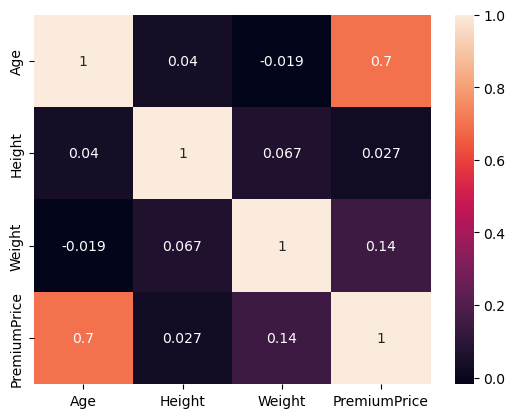

In [51]:
sns.heatmap(corr, annot = True)
plt.show()

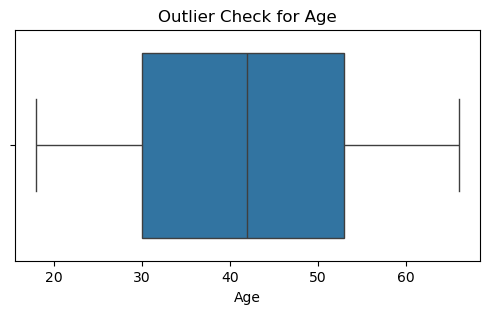

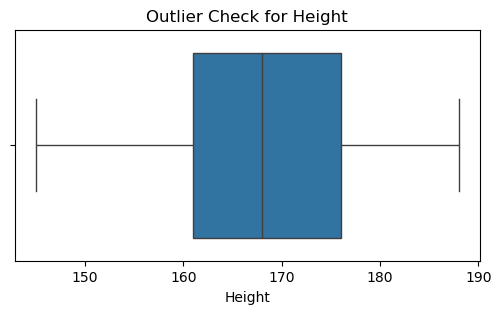

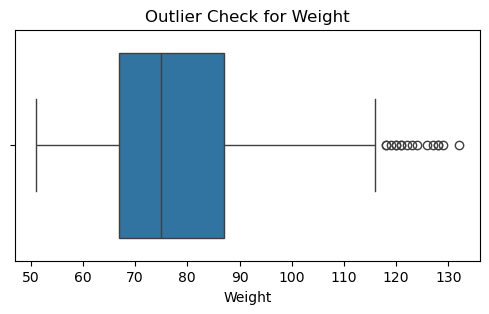

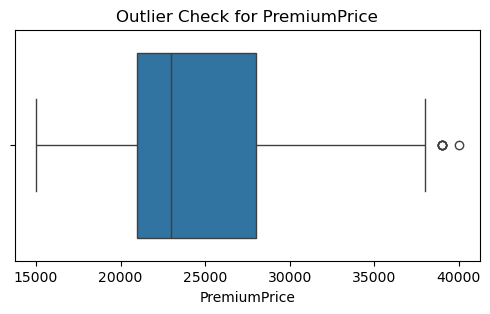

In [52]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check for {col}")
    plt.show()

## Hypothesis Testing

## T-Test Analysis Plan

In this analysis, I will perform **independent two-sample t-tests** (Welch’s t-test) to compare the mean `PremiumPrice` across groups defined by each binary health-related variable in the dataset.  
The variables to be tested include:  

- **Diabetes** (0 = No, 1 = Yes)  
- **BloodPressureProblems** (0 = No, 1 = Yes)  
- **AnyTransplants** (0 = No, 1 = Yes)  
- **AnyChronicDiseases** (0 = No, 1 = Yes)  
- **KnownAllergies** (0 = No, 1 = Yes)  
- **HistoryOfCancerInFamily** (0 = No, 1 = Yes)  

For each variable:  

- **Null Hypothesis (H₀):** There is no significant difference in mean `PremiumPrice` between the two groups.  
- **Alternative Hypothesis (H₁):** There is a significant difference in mean `PremiumPrice` between the two groups.  

The test will be performed using a significance level of **α = 0.05**.  
A p-value below 0.05 will indicate that the difference in means is **statistically significant**.

---

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    category
 10  PremiumPrice             986 non-null    int64   
dtypes: category(7), int64(4)
memory usage: 38.6 KB


In [64]:
group0 = df[df['Diabetes'] == 0]['PremiumPrice']
group1 = df[df['Diabetes'] == 1]['PremiumPrice']

In [65]:
group0.head()

0    25000
4    23000
5    23000
6    21000
7    15000
Name: PremiumPrice, dtype: int64

In [66]:
# Perform Welch's t-test (equal_var=False)
t_stat, p_val = ttest_ind(group0, group1,equal_var=False)

In [68]:
print("T-statistic:", t_stat)
print("P-value:", p_val)
# Decision rule
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis — significant difference exists.")
else:
    print("Fail to reject the null hypothesis — no significant difference.")

T-statistic: -2.4489285982890396
P-value: 0.014508142994631809
Reject the null hypothesis — significant difference exists.


In [69]:
t_test_columns = ['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']

In [73]:
# Loop through all binary variables
for col in t_test_columns:
    # Split data into two groups
    group0 = df[df[col] == 0]['PremiumPrice']
    group1 = df[df[col] == 1]['PremiumPrice']
    
    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    
    # Calculate means for clarity
    mean0 = group0.mean()
    mean1 = group1.mean()
    
    # Print results in a formatted way
    print(f"Variable: {col}")
    print(f"  Mean (0): {mean0:.2f}")
    print(f"  Mean (1): {mean1:.2f}")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value for {col}: {p_val:.4f}")  # variable name included here
    
    # Decision rule
    alpha = 0.05
    if p_val < alpha:
        print(f"  → Reject H0: Significant difference exists for {col}.\n")
    else:
        print(f"  → Fail to reject H0: No significant difference for {col}.\n")

Variable: Diabetes
  Mean (0): 23931.82
  Mean (1): 24896.14
  T-statistic: -2.449
  P-value for Diabetes: 0.0145
  → Reject H0: Significant difference exists for Diabetes.

Variable: BloodPressureProblems
  Mean (0): 23356.87
  Mean (1): 25448.05
  T-statistic: -5.370
  P-value for BloodPressureProblems: 0.0000
  → Reject H0: Significant difference exists for BloodPressureProblems.

Variable: AnyTransplants
  Mean (0): 23897.96
  Mean (1): 31763.64
  T-statistic: -6.260
  P-value for AnyTransplants: 0.0000
  → Reject H0: Significant difference exists for AnyTransplants.

Variable: AnyChronicDiseases
  Mean (0): 23725.25
  Mean (1): 27112.36
  T-statistic: -7.708
  P-value for AnyChronicDiseases: 0.0000
  → Reject H0: Significant difference exists for AnyChronicDiseases.

Variable: KnownAllergies
  Mean (0): 24297.16
  Mean (1): 24481.13
  T-statistic: -0.367
  P-value for KnownAllergies: 0.7141
  → Fail to reject H0: No significant difference for KnownAllergies.

Variable: HistoryOfCa

In [77]:
# Split PremiumPrice by NumberOfMajorSurgeries groups
group0 = df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice']
group1 = df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice']
group2 = df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice']
group3 = df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice']
# Perform one-way ANOVA
f_stat, p_val = f_oneway(group0, group1, group2, group3)

print(f"ANOVA results for NumberOfMajorSurgeries:")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  P-value: {p_val:.4f}")

# Decision rule
alpha = 0.05
if p_val < alpha:
    print("  → Reject H0: Significant difference exists between groups.")
else:
    print("  → Fail to reject H0: No significant difference between groups.")

ANOVA results for NumberOfMajorSurgeries:
  F-statistic: 26.135
  P-value: 0.0000
  → Reject H0: Significant difference exists between groups.


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    category
 10  PremiumPrice             986 non-null    int64   
dtypes: category(7), int64(4)
memory usage: 38.6 KB


In [84]:
# Contingency table
contingency_table = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'])
print("Contingency Table:")
print(contingency_table)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Decision rule
alpha = 0.05
if p < alpha:
    print("→ Reject H0: Variables are dependent.")
else:
    print("→ Fail to reject H0: Variables are independent.")

Contingency Table:
BloodPressureProblems    0    1
Diabetes                       
0                      335  237
1                      189  225

Chi-square Statistic: 15.571
P-value: 0.0001
Degrees of Freedom: 1
Expected Frequencies:
[[303.98377282 268.01622718]
 [220.01622718 193.98377282]]
→ Reject H0: Variables are dependent.
